# Embed RNASeq data into two dimensions

Data are from [GDC TCGA Acute Myeloid Leukemia (LAML)](https://xenabrowser.net/datapages/?cohort=GDC%20TCGA%20Acute%20Myeloid%20Leukemia%20(LAML)&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443).

In [1]:
!wget -q -nc https://gdc-hub.s3.us-east-1.amazonaws.com/download/TCGA-LAML.htseq_counts.tsv.gz

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.manifold

In [3]:
df = pd.read_csv("TCGA-LAML.htseq_counts.tsv.gz", delimiter="\t", index_col="Ensembl_ID")
# Transpose so that the shape is (patients, gene_samples)
df = df.T
df.index.name = "id"
df.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
id,,,,,,,,,,,,,,,,,,,,,
TCGA-AB-2949-03B,5.129283,1.0,9.972980,9.980140,9.517669,11.398744,6.228819,9.722808,10.982281,11.914759,...,0.0,0.0,0.0,0.0,0.0,24.678424,20.571329,0.0,0.0,24.610855
TCGA-AB-2918-03A,3.700440,1.0,9.885696,10.052568,9.823367,11.913263,6.507795,10.583083,11.206404,11.120886,...,0.0,0.0,0.0,0.0,0.0,24.443227,20.502809,0.0,0.0,24.305595
TCGA-AB-2943-03A,5.209453,0.0,9.868823,10.965784,10.388017,11.738937,8.577429,9.854868,11.509280,12.251187,...,0.0,0.0,0.0,0.0,0.0,24.493297,20.390887,0.0,0.0,24.751077
TCGA-AB-2851-03A,2.000000,0.0,9.301496,9.463524,8.317413,14.521355,3.906891,10.850187,10.773139,11.019591,...,0.0,0.0,0.0,0.0,0.0,24.385577,20.275622,0.0,0.0,24.536128
TCGA-AB-2822-03A,3.906891,0.0,9.643856,10.231221,9.392317,7.294621,6.209453,9.808964,11.184875,11.727920,...,0.0,0.0,0.0,0.0,0.0,24.987258,20.191845,0.0,0.0,25.070984


In [4]:
expression = df.to_numpy()
expression.shape

(151, 60488)

In [5]:
tsne = sklearn.manifold.TSNE(
    n_components=2,
    metric="euclidean",
    init="pca",
    learning_rate="auto",
    n_jobs=6,
    random_state=42,
)

In [6]:
expression_embedded = tsne.fit_transform(expression)

/tmp/BMI511/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [7]:
expression_embedded.shape

(151, 2)

Text(0.5, 1.0, 't-SNE embedding of RNASeq counts (TCGA-LAML)')

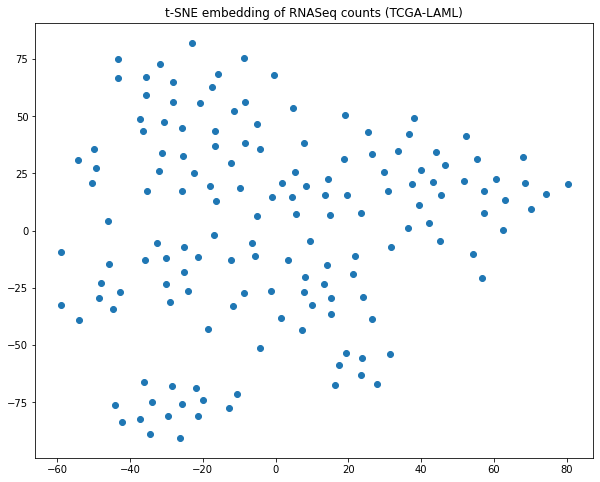

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x=expression_embedded[:, 0], y=expression_embedded[:, 1])
ax.set_title("t-SNE embedding of RNASeq counts (TCGA-LAML)")

## Color points by phenotypic data

In [9]:
!wget -nc -q https://gdc-hub.s3.us-east-1.amazonaws.com/download/TCGA-LAML.GDC_phenotype.tsv.gz

In [10]:
df_phenotype = pd.read_csv("TCGA-LAML.GDC_phenotype.tsv.gz", delimiter="\t", index_col="submitter_id.samples")
df_phenotype.head()

,acute_myeloid_leukemia_calgb_cytogenetics_risk_category,age_at_initial_pathologic_diagnosis,atra_exposure,batch_number,bcr,submitter_id,cumulative_agent_total_dose,cytogenetic_abnormality_other,cytogenetic_analysis_performed_ind,day_of_dcc_upload,...,releasable.project,bcr_id.tissue_source_site,code.tissue_source_site,name.tissue_source_site,project.tissue_source_site,is_ffpe.samples,sample_type.samples,sample_type_id.samples,state.samples,tissue_type.samples
submitter_id.samples,,,,,,,,,,,,,,,,,,,,,
TCGA-AB-2812-03A,Intermediate/Normal,25,NO,25.17.0,Washington University,TCGA-AB-2812,4000.0,NaN,YES,9,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Primary Blood Derived Cancer - Peripheral Blood,3,released,Not Reported
TCGA-AB-2812-03B,Intermediate/Normal,25,NO,25.17.0,Washington University,TCGA-AB-2812,4000.0,NaN,YES,9,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Primary Blood Derived Cancer - Peripheral Blood,3,released,Not Reported
TCGA-AB-2812-03C,Intermediate/Normal,25,NO,25.17.0,Washington University,TCGA-AB-2812,4000.0,NaN,YES,9,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Primary Blood Derived Cancer - Peripheral Blood,3,released,Not Reported
TCGA-AB-2812-11A,Intermediate/Normal,25,NO,25.17.0,Washington University,TCGA-AB-2812,4000.0,NaN,YES,9,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Solid Tissue Normal,11,released,Not Reported
TCGA-AB-2812-11B,Intermediate/Normal,25,NO,25.17.0,Washington University,TCGA-AB-2812,4000.0,NaN,YES,9,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Solid Tissue Normal,11,released,Not Reported


In [11]:
df_merged = df.merge(df_phenotype, left_index=True, right_index=True)
df_merged.head()

,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,releasable.project,bcr_id.tissue_source_site,code.tissue_source_site,name.tissue_source_site,project.tissue_source_site,is_ffpe.samples,sample_type.samples,sample_type_id.samples,state.samples,tissue_type.samples
TCGA-AB-2949-03B,5.129283,1.0,9.972980,9.980140,9.517669,11.398744,6.228819,9.722808,10.982281,11.914759,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Primary Blood Derived Cancer - Peripheral Blood,3,released,Not Reported
TCGA-AB-2918-03A,3.700440,1.0,9.885696,10.052568,9.823367,11.913263,6.507795,10.583083,11.206404,11.120886,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Primary Blood Derived Cancer - Peripheral Blood,3,released,Not Reported
TCGA-AB-2943-03A,5.209453,0.0,9.868823,10.965784,10.388017,11.738937,8.577429,9.854868,11.509280,12.251187,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Primary Blood Derived Cancer - Peripheral Blood,3,released,Not Reported
TCGA-AB-2851-03A,2.000000,0.0,9.301496,9.463524,8.317413,14.521355,3.906891,10.850187,10.773139,11.019591,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Primary Blood Derived Cancer - Peripheral Blood,3,released,Not Reported
TCGA-AB-2822-03A,3.906891,0.0,9.643856,10.231221,9.392317,7.294621,6.209453,9.808964,11.184875,11.727920,...,False,NCH,AB,Washington University,Acute Myeloid Leukemia,False,Primary Blood Derived Cancer - Peripheral Blood,3,released,Not Reported


In [12]:
import seaborn as sns

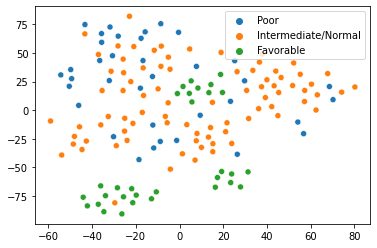

In [13]:
sns.scatterplot(
    x=expression_embedded[:, 0],
    y=expression_embedded[:, 1],
    hue=df_merged.loc[:, "acute_myeloid_leukemia_calgb_cytogenetics_risk_category"],
)
plt.legend()

In [14]:
df_phenotype.columns

Index(['acute_myeloid_leukemia_calgb_cytogenetics_risk_category',
       'age_at_initial_pathologic_diagnosis', 'atra_exposure', 'batch_number',
       'bcr', 'submitter_id', 'cumulative_agent_total_dose',
       'cytogenetic_abnormality_other', 'cytogenetic_analysis_performed_ind',
       'day_of_dcc_upload', 'days_to_initial_pathologic_diagnosis',
       'disease_detection_molecular_analysis_method_type', 'file_uuid',
       'fish_evaluation_performed_ind',
       'fluorescence_in_situ_hybrid_cytogenetics_metaphase_nucleus_result_count',
       'fluorescence_in_situ_hybridization_abnormal_result_indicator',
       'germline_testing_performed', 'history_of_neoadjuvant_treatment',
       'hydroxyurea_administration_prior_registration_clinical_study_indicator',
       'hydroxyurea_agent_administered_day_count', 'informed_consent_verified',
       'lab_procedure_abnormal_lymphocyte_result_percent_value',
       'lab_procedure_blast_cell_outcome_percentage_value',
       'lab_procedure_bo

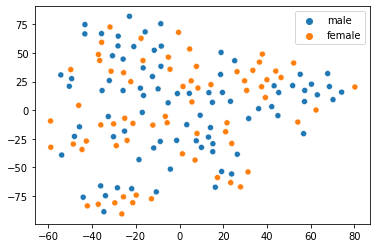

In [15]:
sns.scatterplot(
    x=expression_embedded[:, 0],
    y=expression_embedded[:, 1],
    hue=df_merged.loc[:, "gender.demographic"],
)
plt.legend()

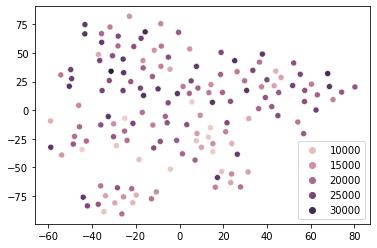

In [16]:
sns.scatterplot(
    x=expression_embedded[:, 0],
    y=expression_embedded[:, 1],
    hue=df_merged.loc[:, "age_at_diagnosis.diagnoses"],
)
plt.legend()